### Berlin Marathon 2009/2017 Data Comparison - Christopher Kenny
##### Primary = 2009 <br>Secondary = 2017 <br><br>Notes:<br>- Analysis marked with a roman numeral indicate that they are used in the comparison in Task 4 <br>- In the analysis, there is some fluctuation between the terms Male/Female and Men/Women, this was done on a solely gramatical basis, and only references the binary nature of the "sex" column in both datasets.


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Task 1: Data Preparation

In [102]:
df09 = pd.read_csv("2009_data.csv")
df17 = pd.read_csv("2017_data.csv")

##### <b>Inspecting dimensionality of datasets</b>

In [103]:
#2009
print("rows:", df09.shape[0])
df09.head()

rows: 35015


,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto
0,172,28062,DEU,1961,M45,4206,M,23300,00:31:57,01:05:16,01:37:53,02:11:47,02:46:25,03:21:22,03:56:53,04:32:16,02:19:08,04:47:59,04:59:22
1,173,5208,USA,1957,M50,382,M,4941,00:25:14,00:49:56,01:14:52,01:39:28,02:04:12,02:28:49,02:53:22,03:18:23,01:44:56,03:28:57,03:34:32
2,174,29143,DEU,1965,M40,5227,M,24050,00:28:59,00:59:41,01:30:25,02:02:17,02:38:25,03:15:36,03:58:11,04:38:46,02:09:37,04:53:17,05:01:11
3,175,16661,DEU,1962,M45,2719,M,14786,00:29:46,00:59:27,01:28:11,01:57:31,02:27:04,02:56:39,03:25:27,03:55:21,02:03:54,04:07:28,04:22:02
4,176,34980,USA,1960,M45,4989,M,27926,00:37:10,01:19:02,02:00:39,02:49:37,03:39:19,04:30:49,05:22:01,00:00:00,03:00:36,06:33:25,06:49:20


In [104]:
#2017
print("rows:", df17.shape[0])
df09.head()

rows: 39223


,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto
0,172,28062,DEU,1961,M45,4206,M,23300,00:31:57,01:05:16,01:37:53,02:11:47,02:46:25,03:21:22,03:56:53,04:32:16,02:19:08,04:47:59,04:59:22
1,173,5208,USA,1957,M50,382,M,4941,00:25:14,00:49:56,01:14:52,01:39:28,02:04:12,02:28:49,02:53:22,03:18:23,01:44:56,03:28:57,03:34:32
2,174,29143,DEU,1965,M40,5227,M,24050,00:28:59,00:59:41,01:30:25,02:02:17,02:38:25,03:15:36,03:58:11,04:38:46,02:09:37,04:53:17,05:01:11
3,175,16661,DEU,1962,M45,2719,M,14786,00:29:46,00:59:27,01:28:11,01:57:31,02:27:04,02:56:39,03:25:27,03:55:21,02:03:54,04:07:28,04:22:02
4,176,34980,USA,1960,M45,4989,M,27926,00:37:10,01:19:02,02:00:39,02:49:37,03:39:19,04:30:49,05:22:01,00:00:00,03:00:36,06:33:25,06:49:20


##### There is an increase in participants from 2009 to 2017 of 4208

##### <b>Identifying Missing Data</b>

In [105]:
#2009
missing09 = df09.isna().sum()

print("2009")
print(missing09)



2009
id                0
platz             0
nation            1
jahrgang          0
ak                0
ak_plazierung     0
sex               0
sex_plazierung    0
z5                0
z10               0
z15               0
z20               0
z25               0
z30               0
z35               0
z40               0
halbmarathon      0
netto             0
brutto            0
dtype: int64


##### We can see that only 1 entry in the dataset contains a missing value, because a single entry is very insignificant in comparison to the dimensionality of this data, we can remove the missing value from the dataset

In [106]:
#Dropping Missing Values
df09 = df09.dropna()

##### <b>Checking for duplicate entries</b>

In [107]:
print("2009 Duplicates: ", df09.duplicated().sum())
print("2017 Duplicates: ", df17.duplicated().sum())

2009 Duplicates:  0
2017 Duplicates:  0


##### There are no duplicate entries in either datasets

##### <b>Translating column headers</b>

##### For the purpose of easier intrepretability, I will translate some of the column names to english. Due to the inclusion of underscores, this cannnot be done using the googletrans library, instead a manually assigned translation dictionary will be used

In [108]:
# Manually creating the translation dictionary for necessary columns
translated_columns = {
    "platz" : "place",
    "jahrgang" : "birthyear",
    "ak" : "ageCat",
    "ak_plazierung" : "ageCat_placement",
    "sex_plazierung" : "sex_placement",
    "halbmarathon" : "half_marathon",
    "netto" : "net",
    "brutto" : "gross"
}

# Replacing the names of necessary columns with translation dictionary
df09.rename(columns=translated_columns, inplace=True)
df17.rename(columns=translated_columns, inplace=True)

##### <b>Removing Outliers</b>

##### Because the 'ageCat' column is categorical, we can make a discrete (estimate) age column by subtracting the birth year of each participant from the year of the marathon. <br>By using value counts I was able to identify that there are 28 instances of the "birthyear" column with a value of 0 in the 2009 dataset, we can remove these from our dataset. <br>I was also able to identify a supposed 108 year old participant in the 2009 Berlin marathon. This is a data entry error, as there is no documentation of anyone 108 years old running the Berlin Marathon, the record for the oldest individual to run a marathon is 100 (Fauja Singh).

In [109]:
df09 = df09.drop(df09[df09["birthyear"] == 0].index)
df09 = df09.drop(df09[df09["birthyear"] == 1901].index)
df09 = df09.drop(df09[df09["birthyear"] == 1902].index)

In [110]:
df09["Age~"] = 2009 - df09["birthyear"]
df17["Age~"] = 2017 - df17["birthyear"]

##### <b>Time Conversion</b>

##### The "net" or "finishing time" column is in HH:MM:SS (dtype: <m8[ns])
##### For future analysis, I will create a seconds column, and from that create a minutes column

In [111]:
#first convert "net" to datetime
df09["net"] = pd.to_timedelta(df09["net"])

# create a seconds column from the converte net column
df09["net_seconds"] = df09["net"].dt.total_seconds()

# then create a minutes column
df09["net_minutes"] = df09["net_seconds"] / 60


##### The same can be done for the "half_marathon" column

In [112]:
#first convert "half_marathon" to datetime
df09["half_marathon"] = pd.to_timedelta(df09["half_marathon"])

# create a seconds column from the converte net column
df09["halfm_seconds"] = df09["half_marathon"].dt.total_seconds()

# then create a minutes column
df09["halfm_minutes"] = df09["halfm_seconds"] / 60

##### <b>More missing values</b>

##### There are 54 entries that are missing values for the "halfm_minutes" column, these entries will have to be removed to allow for accurate and coherent analysis.

In [113]:
# Counting recorded half marathon times with value of 0
missing_halfm = (df09["halfm_minutes"] == 0).sum()
print(missing_halfm)

54


In [114]:
# Dropping these rows
df09 = df09[df09["halfm_minutes"] != 0]

##### <b>Renaming of values in 'ageCat' column</b>

##### The MH/WH and MJA/WJA represent athelets between 20-30 and athletes aged 19 and 18 respectively, I will rename these values to ensure consistent ordering when performing various analysis such as boxplots etc.,

In [115]:
df09["ageCat"] = df09["ageCat"].replace({"MH": "M20", "WH": "W20"})
df09["ageCat"] = df09["ageCat"].replace({"MJA": "M18", "WJA": "W18"})

##### <b>Sample</b>

##### Before starting the data characterisation, we can print the head to take a final look at the updated structure of the data

In [116]:
df09.sample(5)

,id,place,nation,birthyear,ageCat,ageCat_placement,sex,sex_placement,z5,z10,...,z35,z40,half_marathon,net,gross,Age~,net_seconds,net_minutes,halfm_seconds,halfm_minutes
21888,22877,9321,DEU,1955,M50,776,M,8650,00:24:46,00:50:43,...,03:02:27,03:32:49,0 days 01:45:42,0 days 03:45:19,03:49:41,54,13519.0,225.316667,6342.0,105.700000
24220,25283,24817,FRA,1970,M35,3569,M,20955,00:29:35,00:59:47,...,03:42:36,04:19:41,0 days 02:08:06,0 days 04:34:39,04:47:36,39,16479.0,274.650000,7686.0,128.100000
13420,14101,10601,ESP,1948,M60,114,M,9766,00:25:32,00:49:56,...,03:06:13,03:37:06,0 days 01:46:13,0 days 03:49:27,03:51:43,61,13767.0,229.450000,6373.0,106.216667
14513,15222,7100,ITA,1962,M45,1166,M,6658,00:23:38,00:48:02,...,02:54:41,03:26:12,0 days 01:43:16,0 days 03:37:01,03:41:21,47,13021.0,217.016667,6196.0,103.266667
8017,8486,16585,NLD,1939,M70,11,M,14728,00:29:17,00:58:49,...,03:22:12,03:53:15,0 days 02:01:58,0 days 04:07:16,04:24:27,70,14836.0,247.266667,7318.0,121.966667


### <b>Task 2.1: Data Characterisation</b>

##### I will first visualise the distribution of ages in the 2009 Berlin Marathon

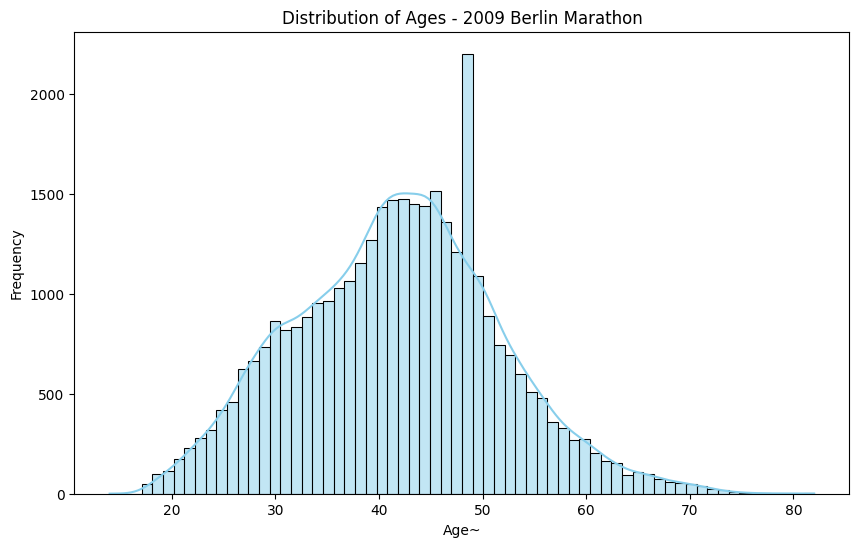

In [117]:
# Using a histogram to display the distribution of ages in the dataframe
plt.figure(figsize=(10, 6))
sns.histplot(df09["Age~"], bins=df09["Age~"].nunique(), kde=True, color="skyblue")
plt.title("Distribution of Ages - 2009 Berlin Marathon")
plt.xlabel("Age~")
plt.ylabel("Frequency")
plt.show()

##### We can begin with a simple summary of the statistics for "net" columns in the 2009 marathon

In [118]:
# Summary statistics for 'net' column
net_summary_stats = df09["net"].describe()
print(net_summary_stats)

count                        34923
mean     0 days 04:12:49.677576382
std      0 days 00:42:12.260219156
min                0 days 02:06:08
25%         0 days 03:43:25.500000
50%                0 days 04:10:07
75%                0 days 04:40:17
max                0 days 07:22:51
Name: net, dtype: object


##### From this summary, we can identify the following descriptive statistics for finishing times <br>Mean: 04:12:51 <br>Min: 02:06:08 (fastest time) <br>Max: 07:22:51 <br>Standard Deviation: 00:42:16 <br>By researching the results of this marathon we can confirm that the fastest time was set by Haile Gebrselasie of Ethiopia. To confirm this in our dataset, we can print the ID of the fastest time and verify if the nationality is ETH (Ethiopia)

In [119]:
df09.loc[df09["net"].idxmin()]

id                            32302
place                             1
nation                          ETH
birthyear                      1973
ageCat                          M35
ageCat_placement                  1
sex                               M
sex_placement                     1
z5                         00:14:30
z10                        00:29:16
z15                        00:43:58
z20                        00:58:34
z25                        01:13:09
z30                        01:27:49
z35                        01:42:37
z40                        01:58:34
half_marathon       0 days 01:01:45
net                 0 days 02:06:08
gross                      02:06:08
Age~                             36
net_seconds                  7568.0
net_minutes              126.133333
halfm_seconds                3705.0
halfm_minutes                 61.75
Name: 30964, dtype: object

##### Above we can confirm that the nationality of the fastest time is ETH

##### <b>i)</b> By using the value_counts() function we can see the breakdown of sexes in the marathon

In [120]:
df09_men = df09[df09["sex"] == "M"]
df09_women = df09[df09["sex"] == "W"]

total_women09 = df09_women.shape[0]
total_men09 = df09_men.shape[0]

print(total_men09, " male competitors")
print(total_women09, " female competitors")

percwomen = (total_women09 / total_men09) * 100

print(round(percwomen, 2), "% of the athletes were women")

27880  male competitors
7043  female competitors
25.26 % of the athletes were women


##### <b>ii)</b> By using box plots, we can gain an insight into the distribution of finishing times among the different age categories for both sexes

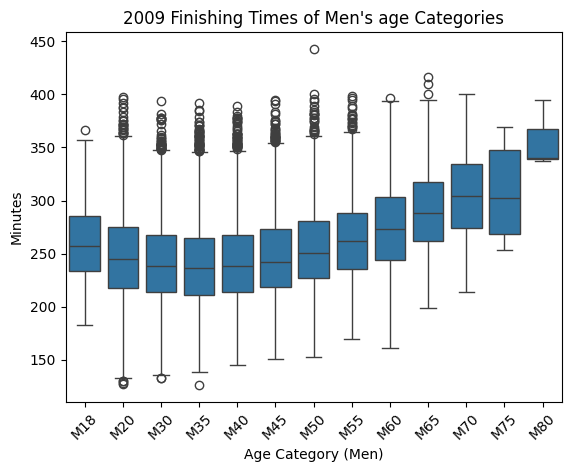

In [121]:
# Creating a boxplot of finishing times (in minutes) for mens age categories
sns.boxplot(x=df09_men["ageCat"], y=df09_men["net_minutes"], data=df09_men, order=sorted(df09_men["ageCat"].unique()))
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.xlabel("Age Category (Men)")
plt.title("2009 Finishing Times of Men's age Categories")
plt.show()

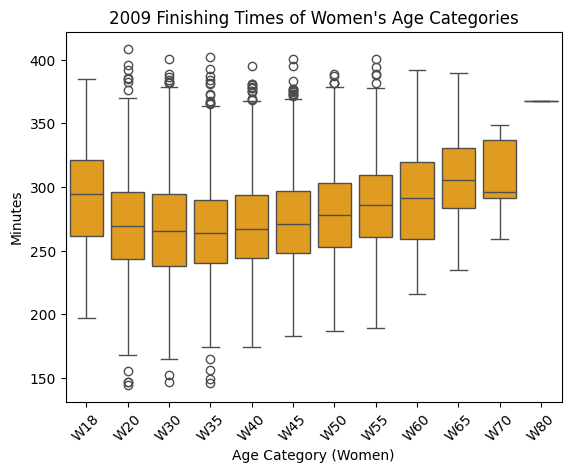

In [122]:
# Creating a boxplot of finishing times (in minutes) for womens age categories
sns.boxplot(x=df09_women["ageCat"], y=df09_women["net_minutes"], data=df09_women, order=sorted(df09_women["ageCat"].unique()), color="orange")
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.xlabel("Age Category (Women)")
plt.title("2009 Finishing Times of Women's Age Categories")
plt.show()

##### From these boxplots we can identify a consistent pattern across the performance of both men's and women's age categories. We can see that the M35/W35 has the best mean finishing time. The performance (finishing time) of both sexes improves as age increases and peaks at the 35 age category, after which perfomance slowly decreases

##### We can also compare the ovreall mean finishing time for Men compared to Women in the marathon

In [123]:
print("Men's mean finishing time (minutes): ", df09_men["net_minutes"].mean())
print("Women's mean finishing time (minutes): ", df09_women["net_minutes"].mean())

Men's mean finishing time (minutes):  247.816443687231
Women's mean finishing time (minutes):  272.6662478110654


##### Above we can see that the mean finishing time for women is roughly 25 minutes longer when compared to the mean men's finishing time

##### <b>iii)</b> We can create a new column in the dataset which removes the first letter from the string of the ageCat variable. For example M40 --> 40, W35 --> 35, etc., <br> By doing this, we can perform further analysis irrespective of sex. We can also represent the mean finishing time of men and women grouped by the newly created column.

In [124]:
# Creating the isolated category (isoCat) column
df09["isoCat"] = df09["ageCat"].str[1:]

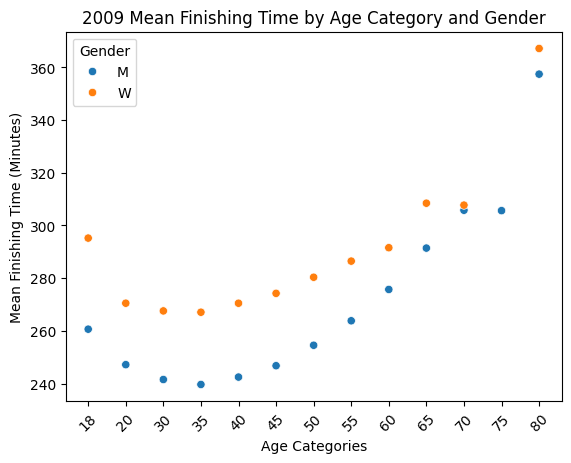

In [125]:
# Grouping by newly created isoCat and sex
grouped_data = df09.groupby(["isoCat", "sex"])["net_minutes"].mean().reset_index()

# Creating a scatterplot to visualise the differences in means across all age categories
sns.scatterplot(x="isoCat", y="net_minutes", hue="sex", data=grouped_data)

plt.title("2009 Mean Finishing Time by Age Category and Gender")
plt.xlabel("Age Categories")
plt.ylabel("Mean Finishing Time (Minutes)")
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.show()

##### This graph produces a clearer visualisation of how both sexes follow the same pattern. We can also observe the lower mean in finishing time of men.

##### <b>Task 2.2</b>

##### To begin investigating whether or not there is a relationship between finishing times and halfmarathon we can calculate the correlation coefficient =

In [126]:
np.corrcoef(df09["halfm_minutes"], df09["net_minutes"])

array([[1.        , 0.94542932],
       [0.94542932, 1.        ]])

##### Here we can see that the half marathon time and the finishing time have a very strong positive correlation, as is to be expected

##### We can also make a scatterplot to visualise this relationship

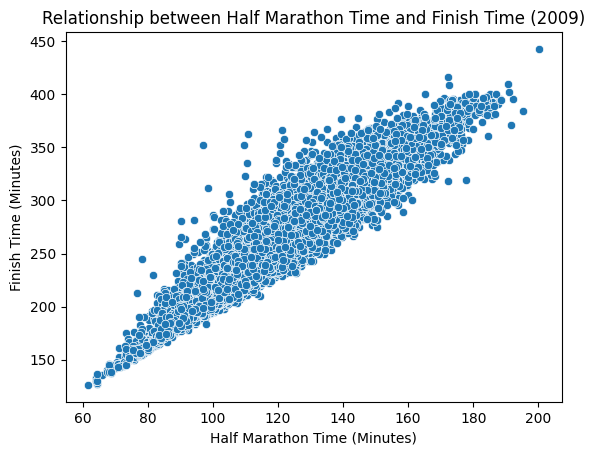

In [127]:
sns.scatterplot(x="halfm_minutes", y="net_minutes", data=df09)

plt.title("Relationship between Half Marathon Time and Finish Time (2009)")
plt.xlabel("Half Marathon Time (Minutes)")
plt.ylabel("Finish Time (Minutes)")

plt.show()

### <b>Task 3.1: Pacing Analysis</b>
##### To begin our pacing analysis we first need to make a <b>"pacing"</b> column. This column will be calulated by subtracting the time of the first half of the marathon from the time of the second half of the marathon. A negative split occurs when the second half is completed quicker than the first half.


In [128]:
df09["pacing"] = (df09["net_minutes"] - df09["halfm_minutes"]) - df09["halfm_minutes"]


##### To analyse the impact of pacing on finish times, we can create another scatterplot and calculate the correlation coefficient

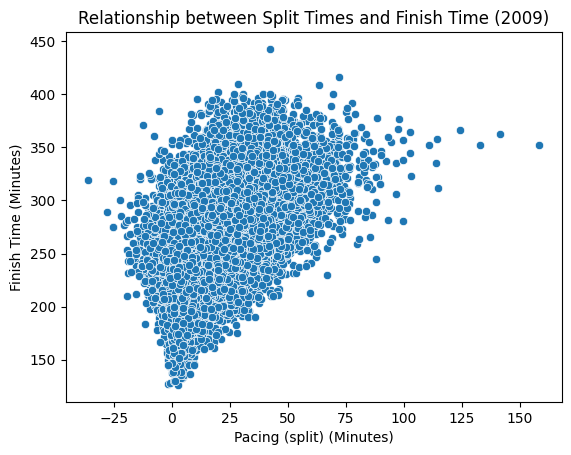

array([[1.        , 0.94542932],
       [0.94542932, 1.        ]])

In [129]:
# Creating scatterplot of pacing and finishing time
sns.scatterplot(x="pacing", y="net_minutes", data=df09)

plt.title("Relationship between Split Times and Finish Time (2009)")
plt.xlabel("Pacing (split) (Minutes)")
plt.ylabel("Finish Time (Minutes)")
plt.show()
np.corrcoef(df09["halfm_minutes"], df09["net_minutes"])


##### From this scatterplot, we can identify a positive correlation between pacing split times (minutes) and finishing time (minutes). The correlation coefficient of 0.94542932 indicates a very strong positive correlation. In the context of this data, we can infer that as a runner's split time becomes more positively split, the longer they are expected to take to finish the marathon.


##### By making a new column <b>"split"</b> we can denote the positive/even/negative split of each runner. In this case, a split is considered to be "even" if the pacing time is between -2 and 2 (minutes), below this threshold (<-2) would be considered "negative" and vice verse for "positive" (>2)

In [130]:
# Assigning the conditions for the new label
conditions = [
    (df09["pacing"] < -2),
    (df09["pacing"] >= -2) & (df09["pacing"] <= 2),
    (df09["pacing"] > 2)
]

# Labels for new "split" column
values = ["Negative", "Even","Positive"]
df09["split"] = np.select(conditions, values, default="Other")

##### <b>iv)</b> Let's take a look at the distribution of the newly created "split" column

In [131]:
df09["split"].value_counts()

split
Positive    30462
Even         3264
Negative     1197
Name: count, dtype: int64

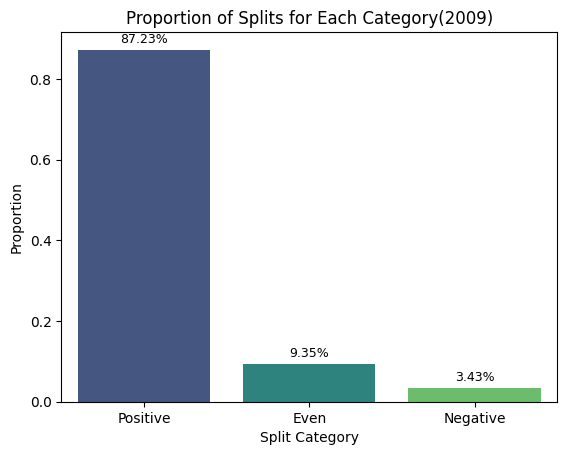

In [132]:

# Creating a new df with proportions
split_proportions = df09["split"].value_counts(normalize=True).reset_index()
split_proportions.columns = ["split", "proportion"]

# Plotting the bar chart
ax = sns.barplot(x="split", y="proportion", data=split_proportions, hue = "split", palette="viridis")

for index, value in enumerate(split_proportions["proportion"]):
    ax.text(index, value + 0.01, f'{value:.2%}', ha="center", va="bottom", fontsize=9)

plt.title("Proportion of Splits for Each Category(2009)")
plt.xlabel("Split Category")
plt.ylabel("Proportion")
plt.show()


##### We can also utilise the newly made "split" column to calculate the average finishing times of each "split" category

In [133]:
df09.groupby("split")["net_minutes"].mean()

split
Even        224.903743
Negative    241.511055
Positive    256.264733
Name: net_minutes, dtype: float64

##### As expected, the "even" split times have the fastest finishing time, this is expected due to "even" splits being desired and representative of good consistent pacing throughout a marathon. <br> The "positive" split times have the slowest average finishing time, this tells us that on average, those who ran faster (quicker time) in the first half of the marathon compared to the second half of the marathon set slower overall times.

##### <b>vi)</b> We can use a pie chart to visualise the proportion of split times among Men and Women in the marathon

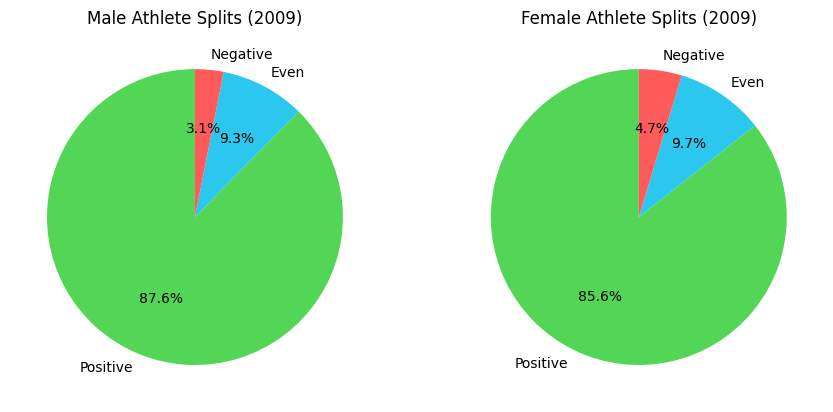

In [134]:
# Making subsets of the data
men09= df09[df09["sex"] == "M"]
women09 = df09[df09["sex"] == "W"]

# Getting the proportional percentage of splits among men and women
male_split_percentage = men09["split"].value_counts(normalize=True) * 100
female_split_percentage = women09["split"].value_counts(normalize=True) * 100

# Plotting the pie charts 
fig, axes = plt.subplots(1, 2, figsize=(10.5, 8))

# Men
axes[0].pie(male_split_percentage, labels=male_split_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#53D656","#2BC7EE","#FF5B5B"])
axes[0].set_title("Male Athlete Splits (2009)")

# Women
axes[1].pie(female_split_percentage, labels=female_split_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#53D656","#2BC7EE","#FF5B5B"])
axes[1].set_title("Female Athlete Splits (2009)")


plt.show()


##### From this visualisation we can see that women had a slightly higher proportion of <b>"Even"</b> split times compared to the men. We can also see that women had a higher proportion of athletes who had a <b>"negative"</b> split time. The male athletes had a higher percentage of <b>"positive"</b> split times. From this we can see that proportionally, there were more women athletes that ran faster second halves than first halves of the 2009 Berlin marathon

##### To visualise the percentage proportionality of splits among the age categories we can use a grouped bar chart.

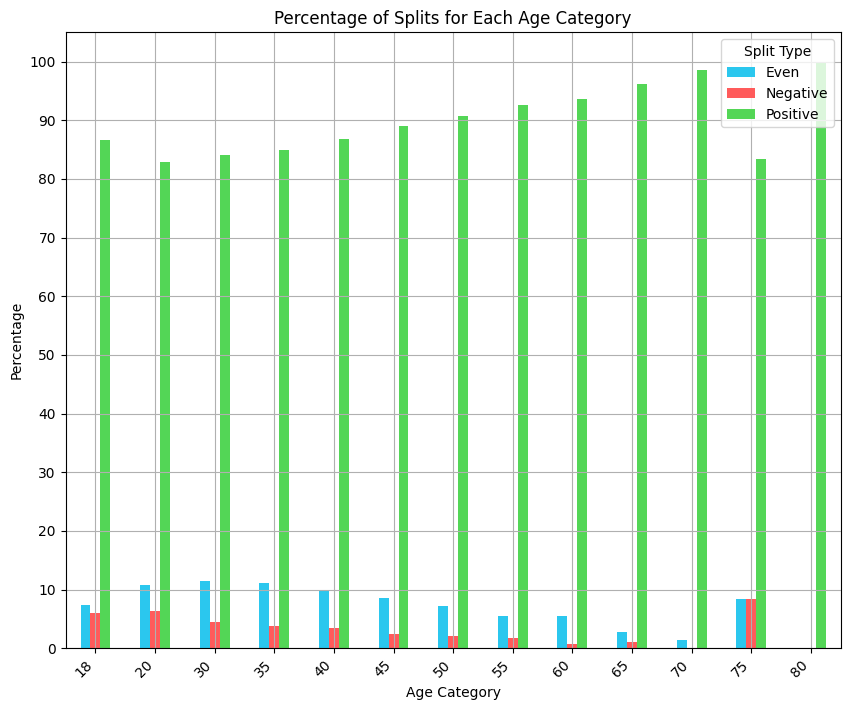

In [135]:

# Calculating the percentage of splits for each age category
age_category_split_percentage = df09.groupby(["isoCat", "split"]).size().unstack("split").div(df09.groupby("isoCat").size(), axis=0) * 100

# Ploting the grouped bar chart
age_category_split_percentage.plot(kind="bar", stacked=False, color = ["#2BC7EE","#FF5B5B", "#53D656"], figsize=(10, 8), grid=True)

plt.title("Percentage of Splits for Each Age Category")
plt.xlabel("Age Category")
plt.ylabel("Percentage")
plt.legend(title="Split Type", loc="upper right")
plt.xticks(rotation=45, ha="right")
plt.yticks(np.linspace(0, 100, num=11))

plt.show()



##### From the grouped bar chart, we can see a trend in the proportion of splits among the age categories. In all age categories under 75, there are more runners that have an "even" split than there are that have a "negative" split. The age categories with the highest percentage of "even" splits is 20,30,35. This is expected as, an "even" split is considered desireable in marathon running, this also reinforces what we saw earlier when we compared the mean performance (finishing time) of each age category, in which we saw the 35 age group perform the best

##### <b>v)</b> By using a linear regression model, we can visualise the relationship between the age of an athlete and their split times

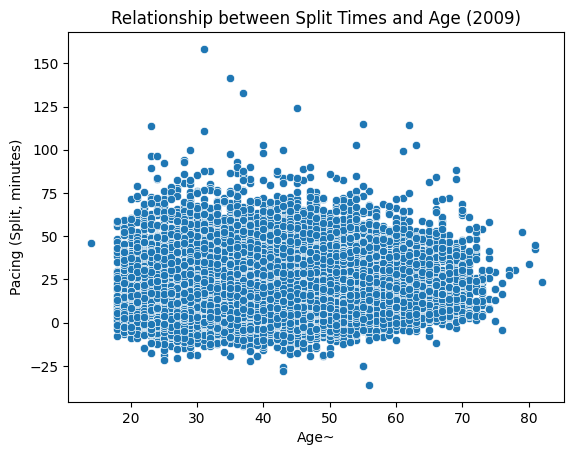

array([[1.        , 0.06539515],
       [0.06539515, 1.        ]])

In [136]:
sns.scatterplot(x="Age~", y="pacing", data=df09)

plt.title("Relationship between Split Times and Age (2009)")
plt.xlabel("Age~")
plt.ylabel("Pacing (Split, minutes)")
plt.show()
np.corrcoef(df09["Age~"], df09["pacing"])

##### From the linear regresion and the correlation coefficient, we can see that there is little to no relationship between age and split times. 

##### To measure whether or not an athlete has "bonked" we can create a new binary column that will denote whether or not an athlete has bonked by calculating if the second half of their marathon took 30% longer than the first half

In [137]:
df09["bonked"] = (df09["net_minutes"] - df09["halfm_minutes"]) > df09["halfm_minutes"] * 1.3

In [138]:
print(df09["bonked"].value_counts())
bonkedcount = (df09["bonked"] == True).sum()
nobonkcount = (df09["bonked"] == False).sum()
bonkpercent = bonkedcount/nobonkcount *100
print("%.2f percent of participants 'bonked' in this marathon" % bonkpercent)

bonked
False    32101
True      2822
Name: count, dtype: int64
8.79 percent of participants 'bonked' in this marathon


##### We can see after creating the new column, that 2822 athletes "bonked" in this marathon

##### <b>vii)</b> To invesitgate the proportion of athletes that bonked between both sexes, we can use pie charts

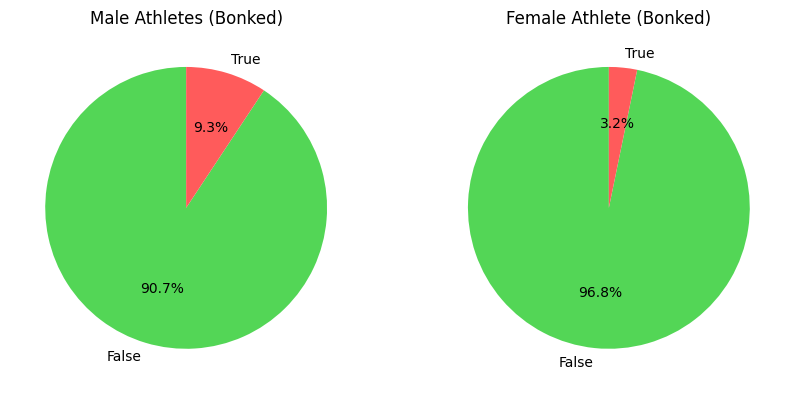

In [139]:
# creating subsets
men09= df09[df09["sex"] == "M"]
women09 = df09[df09["sex"] == "W"]

# Getting percentage of splits among men and women
male_split_percentage = men09["bonked"].value_counts(normalize=True) * 100
female_split_percentage = women09["bonked"].value_counts(normalize=True) * 100

# Plotting the pie charts 
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Men
axes[0].pie(male_split_percentage, labels=male_split_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#53D656","#FF5B5B"])
axes[0].set_title("Male Athletes (Bonked)")

# Women
axes[1].pie(female_split_percentage, labels=female_split_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#53D656","#FF5B5B"])
axes[1].set_title("Female Athlete (Bonked)")


plt.show()

##### Here we can observe some interesting results regarding the proportionality of "bonks" between both sexes. From the pie charts above we can see that 9.3% of male athletes bonked in this marathon whereas only 3.2% of female athletes bonked in this marathon

##### <b>viii)</b> To examine the effect of "bonking" on finish time, we can calculate the mean finishing times of those who bonked and those who did not across each age category

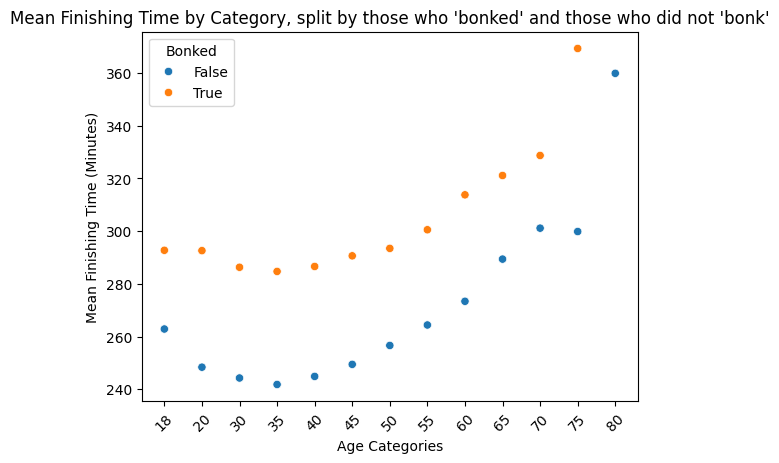

In [140]:
# Grouping by newly created isoCat and sex
grouped_data = df09.groupby(["isoCat", "bonked"])["net_minutes"].mean().reset_index()

# Creating a scatterplot to visualise the differences in means across all categories
sns.scatterplot(x="isoCat", y="net_minutes", hue="bonked", data=grouped_data)

plt.title("Mean Finishing Time by Category, split by those who 'bonked' and those who did not 'bonk'")
plt.xlabel("Age Categories")
plt.ylabel("Mean Finishing Time (Minutes)")
plt.xticks(rotation=45)
plt.legend(title="Bonked")

plt.show()

##### This graph provides a very insightful representation of the effect of "bonking" on finish time. From this graph we can see that for every age category (in which bonking occured) those who bonked in the marathon had a much higher finishing time on average, than those who did not bonk

##### <b>ix)</b> To gain a deeper understanding of the occurance of "bonking" in each age category we can calculate the amount of athletes who "bonked" in each category as a percetnage of the total population of the representative age category

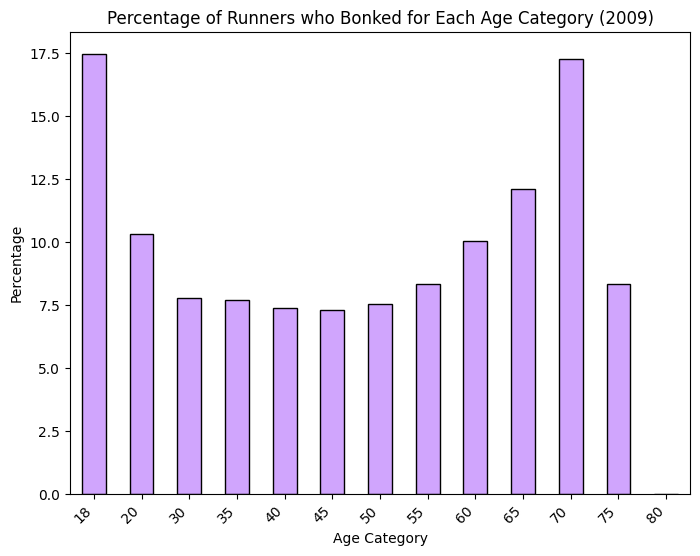

In [141]:
bonked_cat_perc = df09.groupby("isoCat")["bonked"].mean() * 100

# Plot a bar chart
plt.figure(figsize=(8, 6))
bonked_cat_perc.plot(kind="bar", color="#D0A5FD", edgecolor = "black")

plt.title("Percentage of Runners who Bonked for Each Age Category (2009)")
plt.xlabel("Age Category")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right")

plt.show()


##### From this bar chart we can see a notable pattern in the occurance of bonking in each age category. Both the younger and older categories experienced more bonking (proportionally) than the middle age categories.

### <b>Task 4: Validation on 2017 Marathon Data</b>

##### Before I begin my analysis to see if the main findings from Task 2 and 3 hold true for the 2017 marathon, I first need to apply the appropriate data transformation to the 2017 dataset. This will be the same transformation that was used on the 2009 dataset

In [142]:
# Dropping missing values
df17 = df17.dropna()

# Columns were already translated to english, and checked for duplicate (above)

# Converting "net" columns to net_seconds and net_miuntes
df17["net"] = pd.to_timedelta(df17["net"])
df17["net_seconds"] = df17["net"].dt.total_seconds()
df17["net_minutes"] = df17["net_seconds"] / 60

# Doing the same for the half_marathon times
df17["half_marathon"] = pd.to_timedelta(df17["half_marathon"])
df17["halfm_seconds"] = df17["half_marathon"].dt.total_seconds()
df17["halfm_minutes"] = df17["halfm_seconds"] / 60

# Removing entries with a halfm_minutes value of 0
# Dropping these rows
df17 = df17[df17["halfm_minutes"] != 0]

# Note: The ageCat for the 2017 data does not include the sex before the category as we have seen in the 2009 data e.g. [M45]
# Because of this, we do not need to create the isolated category "isoCat" column for the 2017 data
# We do however, need to rename the H and JA values to order the category numerically
df17["ageCat"] = df17["ageCat"].replace({"H": "20", "JA": "18"})

# Creating "pacing" column
df17["pacing"] = (df17["net_minutes"] - df17["halfm_minutes"]) - df17["halfm_minutes"]

# Creating "split" column
# Assigning the conditions for the new label
conditions = [
    (df17["pacing"] < -2),
    (df17["pacing"] >= -2) & (df17["pacing"] <= 2),
    (df17["pacing"] > 2)
]

# Labels for new "split" column
values = ["Negative", "Even", "Positive"]
df17["split"] = np.select(conditions, values, default="Other")

# Creating "bonked" column
df17["bonked"] = (df17["net_minutes"] - df17["halfm_minutes"]) > df17["halfm_minutes"] * 1.3

##### <b>i)</b> The first comprarative analysis we can do is to investigate if more/less/same amount of women competed in the 2017 marathon

In [143]:
df17_men = df17[df17["sex"] == "M"]
df17_women = df17[df17["sex"] == "W"]
total_women17 = df17_women.shape[0]
total_men17 = df17_men.shape[0]

print(total_men17, " male competitors")
print(total_women17, " female competitors")

percwomen17 = (total_women17 / total_men17) * 100

print(round(percwomen17, 2), "% of the athletes were women")

28119  male competitors
11047  female competitors
39.29 % of the athletes were women


##### We can see that the percentage of female competitors increased from <b>25.26%</b> in 2009 to <b>39.29%</b> in 2017

##### <b>ii)</b> Next we can investigate if the mean finishing times for age categories (split by gender) hold the same shape as the 2009 marathon data

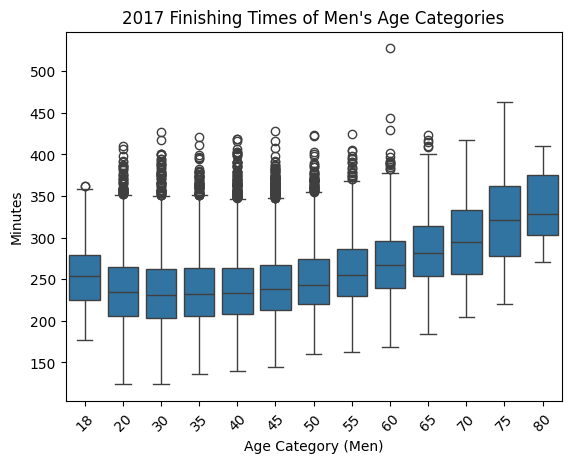

In [144]:
sns.boxplot(x=df17_men["ageCat"], y=df17_men["net_minutes"], data=df17_men, order=sorted(df17_men["ageCat"].unique()))
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.xlabel("Age Category (Men)")
plt.title("2017 Finishing Times of Men's Age Categories")
plt.show()

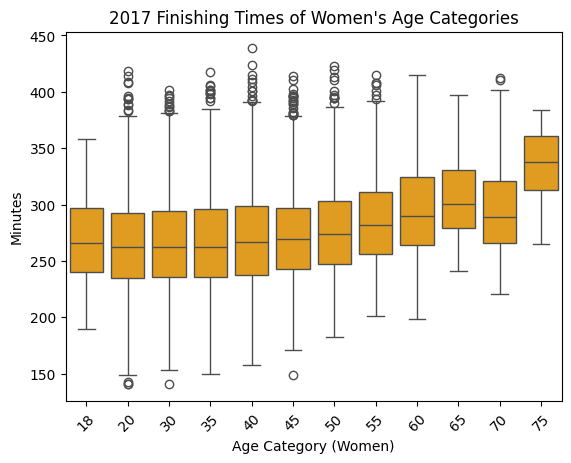

In [145]:
sns.boxplot(x=df17_women["ageCat"], y=df17_women["net_minutes"], data=df17_women, order=sorted(df17_women["ageCat"].unique()), color="orange")
plt.xticks(rotation=45)
plt.ylabel("Minutes")
plt.xlabel("Age Category (Women)")
plt.title("2017 Finishing Times of Women's Age Categories")
plt.show()

##### Interestingly, here we can observe a difference in shape and trend of the finishing times among the athlete's age groups. <br>In the 2009 marathon data, we observed a <b>decrease</b> in performance (finishing times) as we approached the 35 age group for both men and women. <br>However, in the 2017 marathon data, we can see that the lower age groups (18, 20, 30) all had means closer to the 35 age group. This indicates to us that the younger competitors <35 performed better on average in 2017.

##### <b>iii)</b> In the 2009 Marathon the mean finishing times of men across all age categories were faster than the mean finishing times of women, we can graph the 2017 data to see if these results hold true in 2017

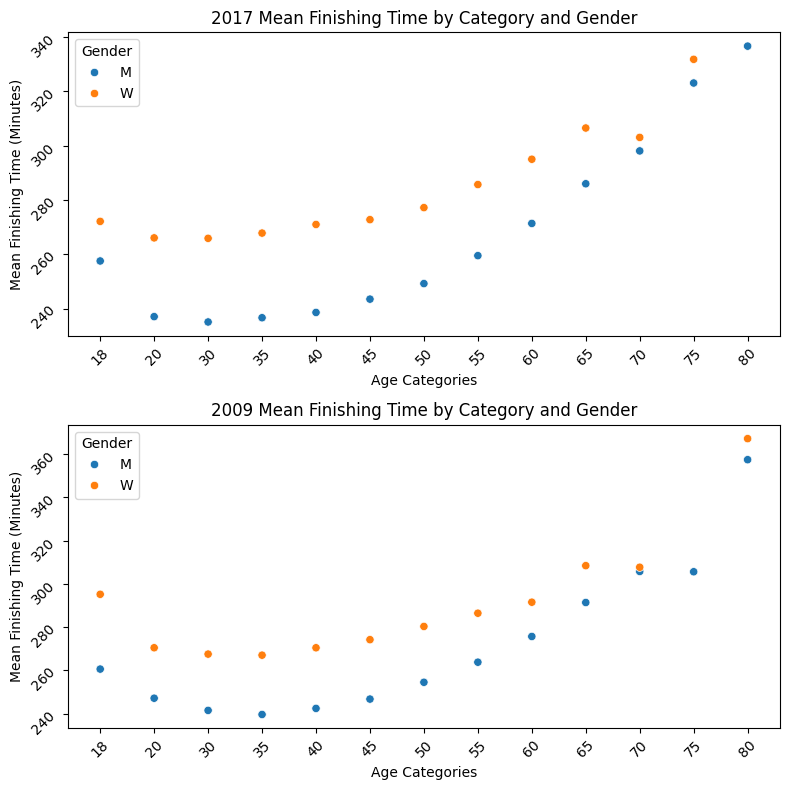

In [146]:
grouped_data17 = df17.groupby(["ageCat", "sex"])["net_minutes"].mean().reset_index()
grouped_data = df09.groupby(["isoCat", "sex"])["net_minutes"].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Creating a scatterplot to visualise the differences in means across all categories
sns.scatterplot(x="ageCat", y="net_minutes", hue="sex", data=grouped_data17, ax=ax1)
ax1.set_title("2017 Mean Finishing Time by Category and Gender")
ax1.set_xlabel("Age Categories")
ax1.set_ylabel("Mean Finishing Time (Minutes)")
ax1.tick_params(rotation=45)
ax1.legend(title="Gender")

sns.scatterplot(x="isoCat", y="net_minutes", hue="sex", data=grouped_data, ax =ax2)
ax2.set_title("2009 Mean Finishing Time by Category and Gender")
ax2.set_xlabel("Age Categories")
ax2.set_ylabel("Mean Finishing Time (Minutes)")
ax2.tick_params(rotation=45)
ax2.legend(title="Gender")

plt.tight_layout()  
plt.show()

##### This comparison of the 2017 and 2009 marathons allows us to identify the improvmenets of the 18 and 20 age categories in 2017 relative to the 35 age category. <br>Upon closer inspection, we can also see that the mean finishing time particularly for men in the 18, 20, 30, 35 and 45 was lower (faster) than the means of these categories in the 2009 marathon data.<br>We can also see the similarity in shape for the age groups above 35 between both marathons.

##### <b>iv)</b> In the 2009 marathon we observed that 87.23% of split times were "positive". We can compare this to the 2017 data to see if the rate of splits remained consistent

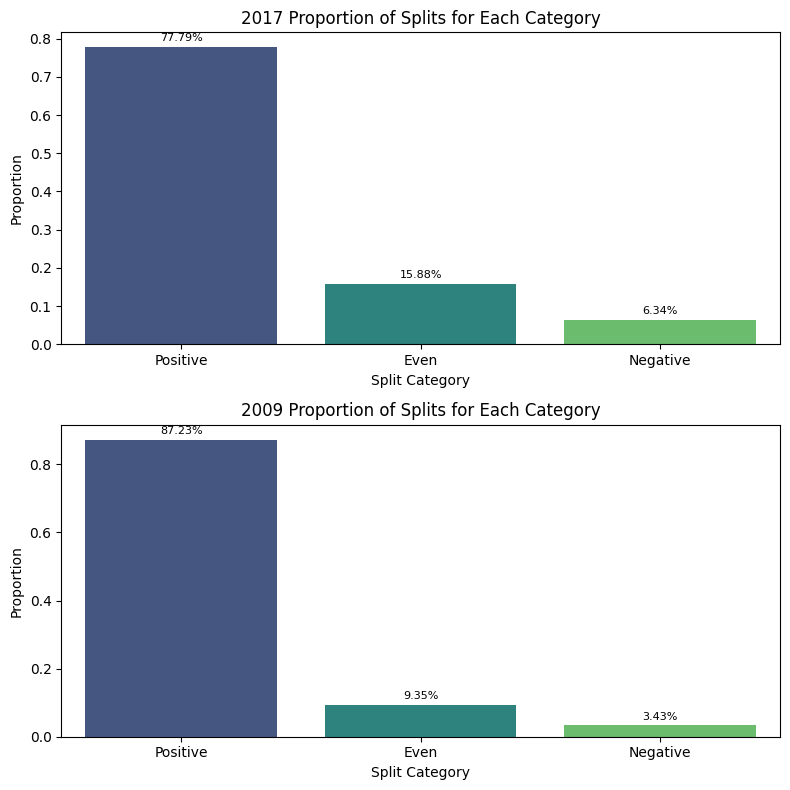

In [147]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
# 2017 Data
split_proportions17 = df17["split"].value_counts(normalize=True).reset_index()
split_proportions17.columns = ["split", "proportion"]

# Plot the stacked bar plot
ax1 = sns.barplot(x="split", y="proportion", data=split_proportions17, hue = "split", palette="viridis", ax=ax1)

for index, value in enumerate(split_proportions17["proportion"]):
    ax1.text(index, value + 0.01, f'{value:.2%}', ha="center", va="bottom", fontsize=8)

ax1.set_title("2017 Proportion of Splits for Each Category")
ax1.set_xlabel("Split Category")
ax1.set_ylabel("Proportion")

#2009 Data
split_proportions09 = df09["split"].value_counts(normalize=True).reset_index()
split_proportions09.columns = ["split", "proportion"]

# Plot the stacked bar plot
ax2 = sns.barplot(x="split", y="proportion", data=split_proportions09, hue = "split", palette="viridis", ax=ax2)

for index, value in enumerate(split_proportions09["proportion"]):
    ax2.text(index, value + 0.01, f'{value:.2%}', ha="center", va="bottom", fontsize=8)

ax2.set_title("2009 Proportion of Splits for Each Category")
ax2.set_xlabel("Split Category")
ax2.set_ylabel("Proportion")

plt.tight_layout()  
plt.show()

##### Suprisingly in the 2017 marathon we can see nearly a 10% reduction in the proportion of "Positive" split times. We can also see an increase in "even" splits of over 6% and just under a doubling of the percentage proportion of "negative" splits. Although the general spread appears to be similar, I was not expecting to see a level of discrepency this high in splits between both marathons. In the context of the data, we now know that more of the participants in the 2017 marathon kept better pacing.

##### <b>v)</b> In the 2009 marathon we observed that age had little to no correlation with pacing. We can calculate the same relationship using a linear regression and the correlation coefficient of the 2017 marathon for these two variables to see if this extremeley weak positive correlation was consistent for both marathons.

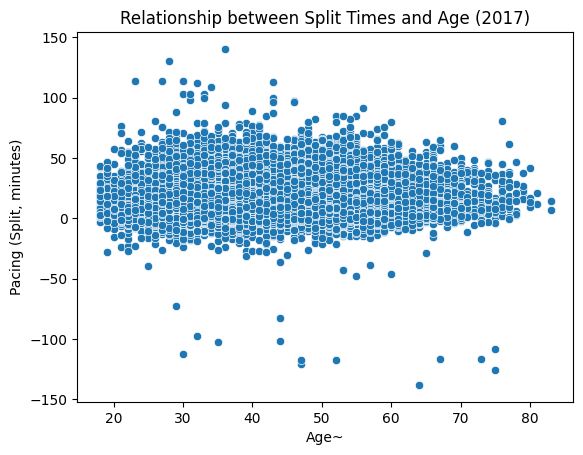

array([[1.        , 0.06018898],
       [0.06018898, 1.        ]])

In [148]:
# Creating scatterplot
sns.scatterplot(x="Age~", y="pacing", data=df17)

plt.title("Relationship between Split Times and Age (2017)")
plt.xlabel("Age~")
plt.ylabel("Pacing (Split, minutes)")
plt.show()
np.corrcoef(df17["Age~"], df17["pacing"])

##### <b>2009 (pacing : Age~)</b> <br>Correlation Coefficient: <b>0.06539515</b> <br><b>2017 (pacing : Age~)</b><br>Correlation Coefficient: <b>0.06018898</b>

##### There is a very slightly weaker correlation between age and pacing in the 2017 data, but, overall we can state that the correlation remained consistent for both marathons

##### <b>vi)</b> Next, we can compare the distribution of splits in sexes between the 2009 marathon and the 2017 marathon

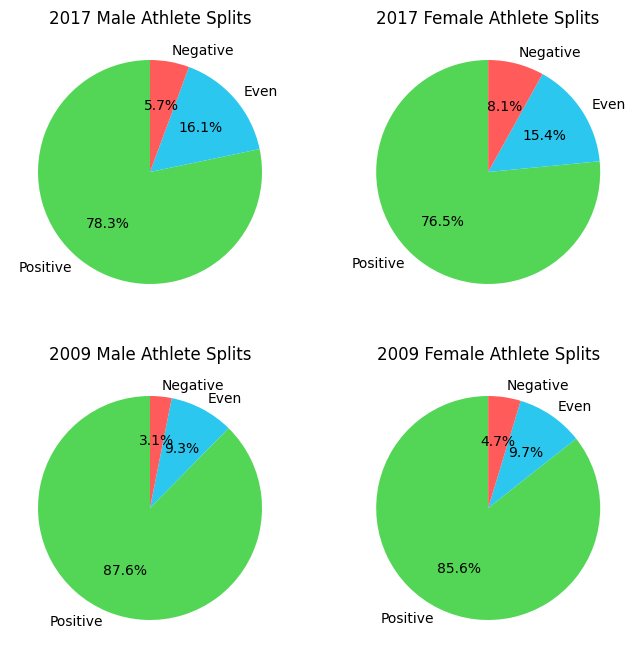

In [149]:
# 2017 Data
men17= df17[df17["sex"] == "M"]
women17 = df17[df17["sex"] == "W"]

# Getting percentage of splits among men and women
male_split_percentage17 = men17["split"].value_counts(normalize=True) * 100
female_split_percentage17 = women17["split"].value_counts(normalize=True) * 100
male_split_percentage09 = men09["split"].value_counts(normalize=True) * 100
female_split_percentage09 = women09["split"].value_counts(normalize=True) * 100


# Plotting the pie charts 
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Men 2017
axes[0, 0].pie(male_split_percentage17, labels=male_split_percentage17.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#2BC7EE','#FF5B5B'])
axes[0, 0].set_title("2017 Male Athlete Splits")
# Women 2017
axes[0, 1].pie(female_split_percentage17, labels=female_split_percentage17.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#2BC7EE','#FF5B5B'])
axes[0, 1].set_title("2017 Female Athlete Splits")

# Men 2009
axes[1, 0].pie(male_split_percentage09, labels=male_split_percentage09.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#2BC7EE','#FF5B5B'])
axes[1, 0].set_title("2009 Male Athlete Splits")
# Women 2009
axes[1, 1].pie(female_split_percentage09, labels=female_split_percentage09.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#2BC7EE','#FF5B5B'])
axes[1, 1].set_title("2009 Female Athlete Splits")

plt.show()


##### The results of this comparison reinforce what we observed in <b>iv)</b>. From 2009 to 2017 we observed a decrease in "positive" split percentage. In 2009, women had a higher percentage of "even" splits but in 2017 this reversed and we can see that men have a higher percentage of "even" splits. "Positive" and "negative" splits remained the same from 2009 to 2017 in the fact that men had a higher "Positive" percentage and a lower "negative" percentage compared to women.

##### <b>vii)</b> In the 2009 marathon data, we could see less female athletes (proportional) "bonked" during the marathon. By producing pie charts with the same parameters for the 2017 data, we can investiage if this remained true for the 2017 data.

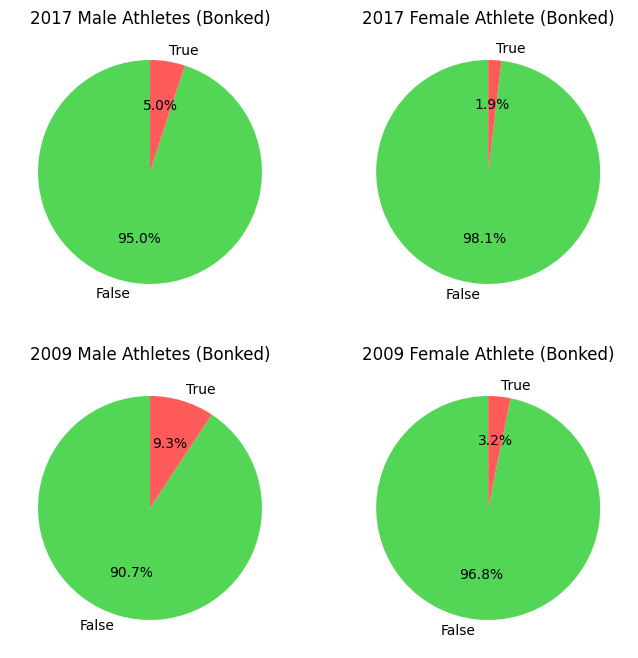

In [150]:
# Data Subsets
men17 = df17[df17["sex"] == "M"]
women17 = df17[df17["sex"] == "W"]
men09= df09[df09["sex"] == "M"]
women09 = df09[df09["sex"] == "W"]
male_split_percentage17 = men17["bonked"].value_counts(normalize=True) * 100
female_split_percentage17 = women17["bonked"].value_counts(normalize=True) * 100
 
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


# Getting percentage of splits among men and women
male_split_percentage09 = men09["bonked"].value_counts(normalize=True) * 100
female_split_percentage09= women09["bonked"].value_counts(normalize=True) * 100

# Men 2017
axes[0, 0].pie(male_split_percentage17, labels=male_split_percentage17.index, autopct='%1.1f%%', startangle=90, colors=['#53D656', '#FF5B5B'])
axes[0, 0].set_title("2017 Male Athletes (Bonked)")
# Women 2017
axes[0, 1].pie(female_split_percentage17, labels=female_split_percentage17.index, autopct='%1.1f%%', startangle=90, colors=['#53D656', '#FF5B5B'])
axes[0, 1].set_title("2017 Female Athlete (Bonked)")

# Men 2009
axes[1, 0].pie(male_split_percentage09, labels=male_split_percentage09.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#FF5B5B'])
axes[1, 0].set_title("2009 Male Athletes (Bonked)")
# Women 2009
axes[1, 1].pie(female_split_percentage09, labels=female_split_percentage09.index, autopct='%1.1f%%', startangle=90, colors=['#53D656','#FF5B5B'])
axes[1, 1].set_title("2009 Female Athlete (Bonked)")


plt.show()


##### Here we can see a noticeable decrease in "bonking" in the both men and women in the 2017 marathon. The proportion of female "bonks" compared to male "bonks" remains true however, for proportionally, women "bonk" at just over a third of the rate of men.

##### <b>viii)</b> There was a noticeable pattern in the finishing times of those who "bonked" and did not "bonk" in the 2009 data. We can plot this data for the 2017 data to see if this shape holds true.

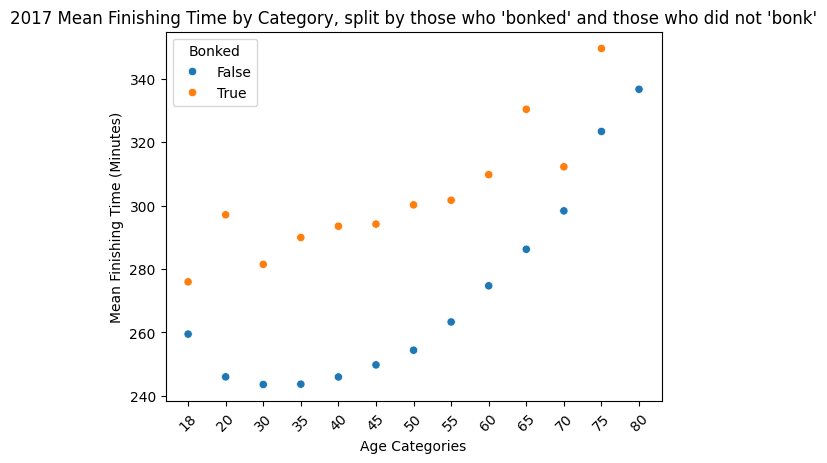

In [151]:
# Grouping by newly created ageCat and sex
grouped_data17 = df17.groupby(["ageCat", "bonked"])["net_minutes"].mean().reset_index()

# Creating a scatterplot to visualise the differences in means across all categories
sns.scatterplot(x="ageCat", y="net_minutes", hue="bonked", data=grouped_data17)

plt.title("2017 Mean Finishing Time by Category, split by those who 'bonked' and those who did not 'bonk'")
plt.xlabel("Age Categories")
plt.ylabel("Mean Finishing Time (Minutes)")
plt.xticks(rotation=45)
plt.legend(title="Bonked")

plt.show()

##### The pattern of finishing times among those who "bonked" and did not "bonk" remains relatively similar and consistent to the 2009 marathon, despite some variation. The average finishing times remains higher for those who did "bonk", which remains true from 2009.

##### <b>ix)</b> Lastly, we can compare the percentage of each age category that "bonked" from 2017 and 2009

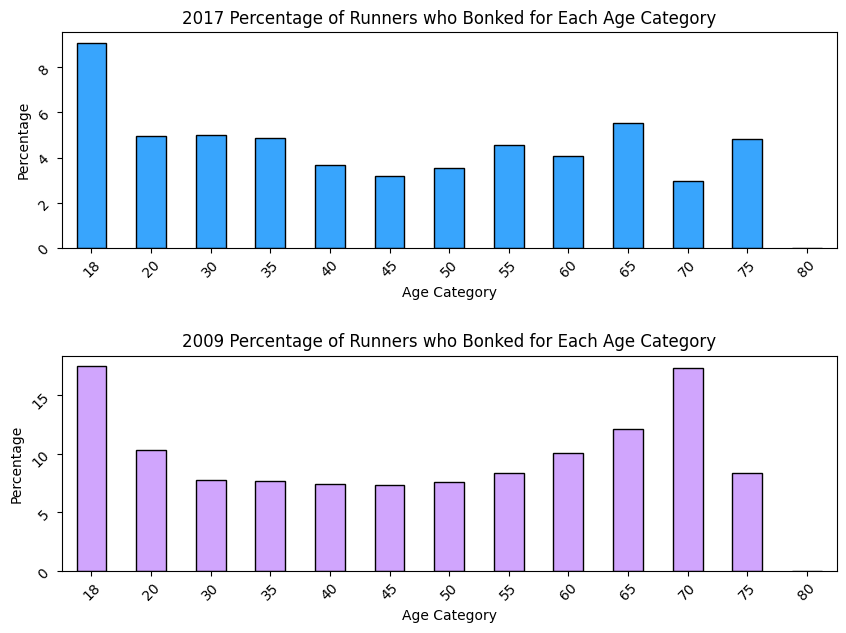

In [152]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
bonked_cat_perc17 = df17.groupby("ageCat")["bonked"].mean() * 100

# Plot a bar chart
ax1 =bonked_cat_perc17.plot(kind="bar", color='#38A5FD', edgecolor = "black", ax = ax1)

ax1.set_title("2017 Percentage of Runners who Bonked for Each Age Category")
ax1.set_xlabel("Age Category")
ax1.set_ylabel("Percentage")
ax1.tick_params(rotation=45)

ax2 =bonked_cat_perc.plot(kind="bar", color='#D0A5FD', edgecolor = "black", ax = ax2)

ax2.set_title("2009 Percentage of Runners who Bonked for Each Age Category")
ax2.set_xlabel("Age Category")
ax2.set_ylabel("Percentage")
ax2.tick_params(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

##### We can see that the trend of "bonking" across age categories remains relatively consistent, we can also see a drastic reduction in "bonking" percentage in 2017 compared to 2009 for all of the age categories.

##### <b>Final Remarks</b> <br>After comparing the 2009 marathon data with the 2017 marathon data there are some noticeable differences. Although patterns and trends occur in a similar fashion, the overall occurance of variables such as bonking and positive splits occur at a much lower rate. <br>The clear take away from this comparison is that the athletes in 2017 had a much better overall performance in the marathon. This could be due to advancements in training technology or health and fitness sciences. We observed a dramatic reduction in the occurance of "bonking", an improvement in mean finishing time for age categories and an increase in the number of "even" splits which all reinforce this claim. <br>Beyond performance statistics, we also observed an sizeable increase in the ratio of women competing in the marathon.